In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter

sns.set_context("talk",rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
sns.set_style("whitegrid",{"grid.color": '.9', 'grid.linestyle': '--','axes.edgecolor': '.6', 'xtick.bottom': True,'ytick.left': True})

colorTable = {}
colorTable['k'] = [0,0,0]
colorTable['g'] = [27/255,158/255,119/255]
colorTable['o'] = [217/255,95/255,2/255]

import random

In [2]:
def prime(sequence):
    inverse_composite=sequence[::-1]
    for i in range(len(inverse_composite)):
        if inverse_composite[i]=='6':
            inverse_composite[i]='9'
        elif inverse_composite[i]=='9':
            inverse_composite[i]='6'
        elif inverse_composite[i].islower():
            inverse_composite[i]=inverse_composite[i].upper()
        elif inverse_composite[i].isupper():
            inverse_composite[i]=inverse_composite[i].lower()
        else:
            raise SyntaxError
    return inverse_composite

def detect_forward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site:
            start_positions.append(i)#computer positions
    
    return start_positions

def detect_backward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site[::-1]:
            start_positions.append(i)#computer positions
    
    return start_positions

#ALL positions recorded in natural counting, not computer indices, delete and inverts [site_1,site_2] inclusive
def delete_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+DNA[site_2:]  

def invert_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+prime(DNA[site_1-1:site_2])+DNA[site_2:] 


        

    

In [3]:
def evaluate_colour_CRE(DNA,choice1,choice2):

    num1, direction_1 = choice1
    num2, direction_2 = choice2
    #WLOG,make num 1 the smaller one
    if num1 > num2:
        num1, num2 = num2, num1
        direction_1, direction_2 = direction_2, direction_1
    
    # Determine which function to use
    if direction_1 == 'forward':
        if direction_1 == direction_2:
            return delete_between(DNA,num1+1,num2)
        elif direction_1!=direction_2:
            return invert_between(DNA,num1+1,num2+1)
    elif direction_1=='backward':
        if direction_1 == direction_2:
            return delete_between(DNA,num1+1,num2)
        else :
            return invert_between(DNA,num1+1,num2+1)

In [4]:
initial_dna_sequence = "A9B6C9D6EF6G9H6I9J6"
numberofevents = 16
DNA = initial_dna_sequence

# outcome_lists= probability_calculation(initial_dna_sequence)

outcome_list=[]

for _ in range(numberofevents):
    outcome_list.append(Counter())
recombinases_event=  0

outcome_list[0][DNA] = 1

# Stage 1
for whichstage in range(1,numberofevents):
    stage = outcome_list[whichstage-1]
    for dna,probs in stage.items():
        # Now work out all the things the recombinases can do
        forward_9_positions=detect_forward_sites(list(dna),['9'])
        backward_6_positions=detect_backward_sites(list(dna),['6'])
        combined = [(num, 'forward') for num in forward_9_positions] + [(num, 'backward') for num in backward_6_positions]
        recombinase_acted = 0
        thisinput = Counter()
        for i in range(len(combined)):
            for j in range(i+1,len(combined)):
                choice1,choice2 = combined[i], combined[j]
                
                output = evaluate_colour_CRE(list(dna),choice1,choice2)

                if output!='DoNotCount':
                    recombinase_acted += 1
                    formatted_output = "".join(output)

                    #print(f"stage {whichstage} dna {dna} recombinase {recombinase_acted} output: {formatted_output}")  # !!!Remove before flight

                    thisinput[formatted_output] +=1

        if recombinase_acted==0:
            normfactor = 1
            thisinput[dna] = 1
        else:
            normfactor = recombinase_acted
        
        for key in thisinput:
            outcome_list[whichstage][key] += thisinput[key]*probs/normfactor
    print(f"Stage {whichstage} has {len(outcome_list[whichstage])} outcomes")

Stage 1 has 36 outcomes
Stage 2 has 410 outcomes
Stage 3 has 3089 outcomes
Stage 4 has 15364 outcomes
Stage 5 has 47341 outcomes
Stage 6 has 91594 outcomes
Stage 7 has 116602 outcomes
Stage 8 has 116664 outcomes
Stage 9 has 116664 outcomes
Stage 10 has 116664 outcomes
Stage 11 has 116664 outcomes
Stage 12 has 116664 outcomes
Stage 13 has 116664 outcomes
Stage 14 has 116664 outcomes
Stage 15 has 116664 outcomes


In [5]:
# Visualisation function to plot ranked probability distributions after each recombination event


def plot_ranked_probabilities(outcome_list):
    for stage in range(len(outcome_list)):
        probs = np.array(sorted(outcome_list[stage].values(), reverse=True))
        ranks = np.arange(1, len(probs) + 1)
        
        # Create a single figure with 1 row and 3 columns of subplots
        fig, axes = plt.subplots(1, 3, figsize=(18, 4))
        fig.suptitle(f'Stage {stage}: Ranked Probabilities', y=1.05)
        
        # Plot 1: Linear scale
        axes[0].plot(ranks, probs, marker='o', linestyle='-', color='b')
        axes[0].set_xlabel('Rank')
        axes[0].set_ylabel('Probability')
        axes[0].set_yscale('linear')
        axes[0].set_title('Linear Scale')
        
        # Plot 2: Log-y scale
        axes[1].plot(ranks, probs, marker='o', linestyle='-', color='b')
        axes[1].set_xlabel('Rank')
        axes[1].set_ylabel('Probability')
        axes[1].set_yscale('log')
        axes[1].set_title('Log-Y Scale')
        
        # Plot 3: Log-log scale
        axes[2].plot(ranks, probs, marker='o', linestyle='-', color='b')
        axes[2].set_xlabel('Rank')
        axes[2].set_ylabel('Probability')
        axes[2].set_yscale('log')
        axes[2].set_xscale('log')
        axes[2].set_title('Log-Log Scale')
        
        plt.tight_layout()
        plt.show()

In [6]:
# Visualisation function to plot the probabilities sum and entropy of outcomes at each stage
def plot_probabilities(outcome_list, numberofevents=1):    
    probsum = 0
    num_of_possible_outcomes = np.zeros(numberofevents)
    total_num_of_outcomes = np.zeros(numberofevents)
    entropy = np.zeros(numberofevents)
    initial_dict=Counter()
    for stage in range(numberofevents):
        probsum = np.sum(list(outcome_list[stage].values()))
        if (probsum-1)> 0.01 or (probsum-1)<-0.01:
            raise ValueError(f"Stage {stage} does not sum to 1, it sums to {probsum}. Please check the input data or the calculation logic.")
        entropy[stage] = -np.sum([p * np.log2(p) for p in outcome_list[stage].values() if p > 0])
        num_of_possible_outcomes[stage] = len(outcome_list[stage])
        initial_dict.update(outcome_list[stage])
        total_num_of_outcomes[stage] = len(initial_dict)

    # # Plot normalisation
    # plt.figure(figsize=(6, 3))
    # plt.plot(probsum, marker='o', linestyle='-', color='k')
    # plt.xlabel('Stage')
    # plt.ylabel('Sum of Probabilities')
    # #plt.ylim(0, 1.1)

    # Plot number of possible outcomes
    plt.figure(figsize=(6, 3))
    plt.plot(num_of_possible_outcomes, marker='o', linestyle='-', color='k')
    plt.xlabel('Stage')
    plt.ylabel('Number of Possible Outcomes occuring at Each Stage')
    #plt.ylim(0, np.max(num_of_possible_outcomes) * 1.1)

    # Plot number of possible outcomes
    plt.figure(figsize=(6, 3))
    plt.plot(total_num_of_outcomes, marker='o', linestyle='-', color='k')
    plt.xlabel('Stage')
    plt.ylabel('Cumulative of Possible Outcomes at Each Stage')
    #plt.ylim(0, np.max(num_of_possible_outcomes) * 1.1)

        # Plot entropy
    plt.figure(figsize=(6, 3))
    plt.plot(entropy, marker='o', linestyle='-', color='k')
    plt.xlabel('Stage')
    plt.ylabel('Entropy')
    #plt.ylim(0, np.max(entropy) * 1.1)

    # Plot ranked probabilities
    plot_ranked_probabilities(outcome_list)



    


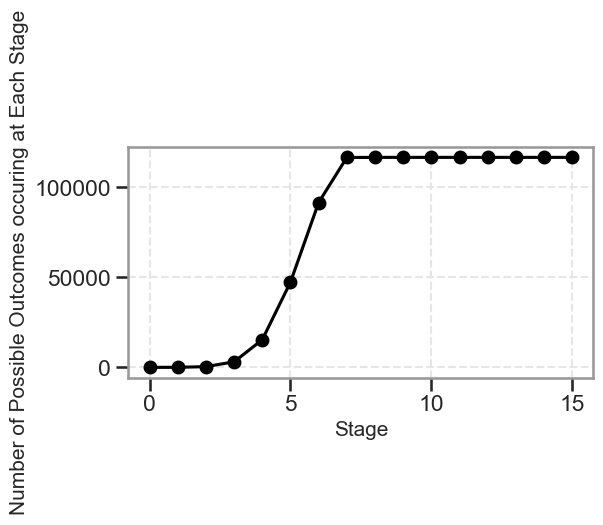

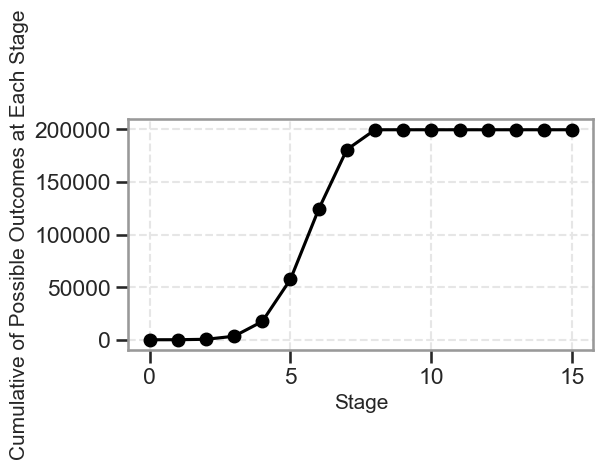

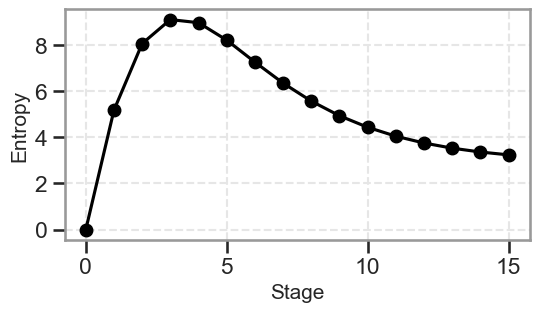

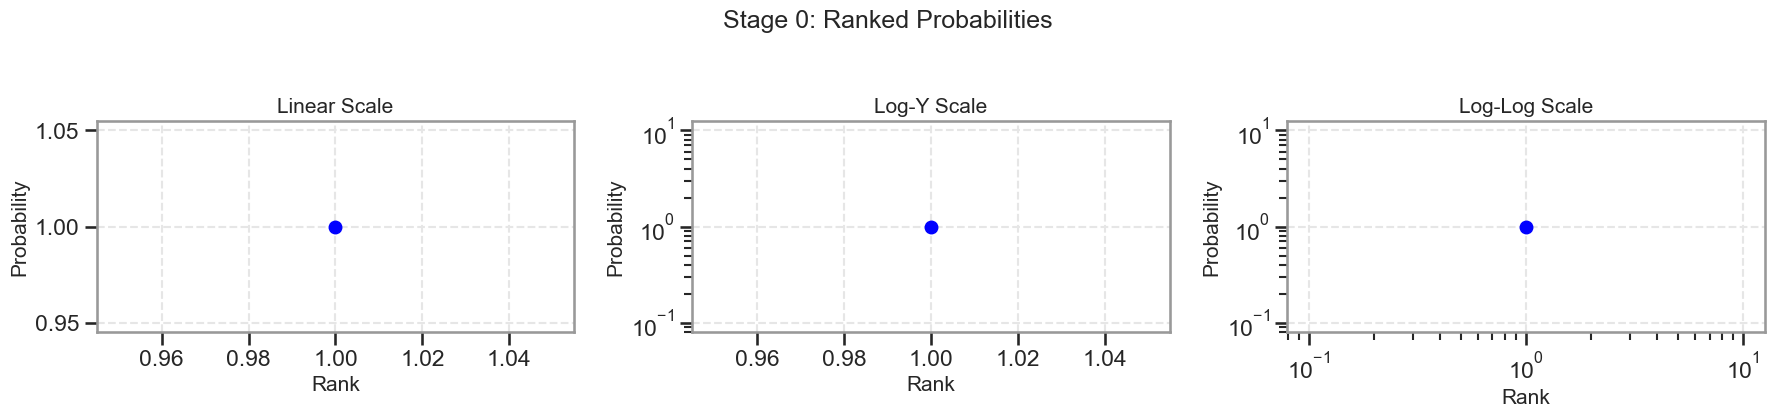

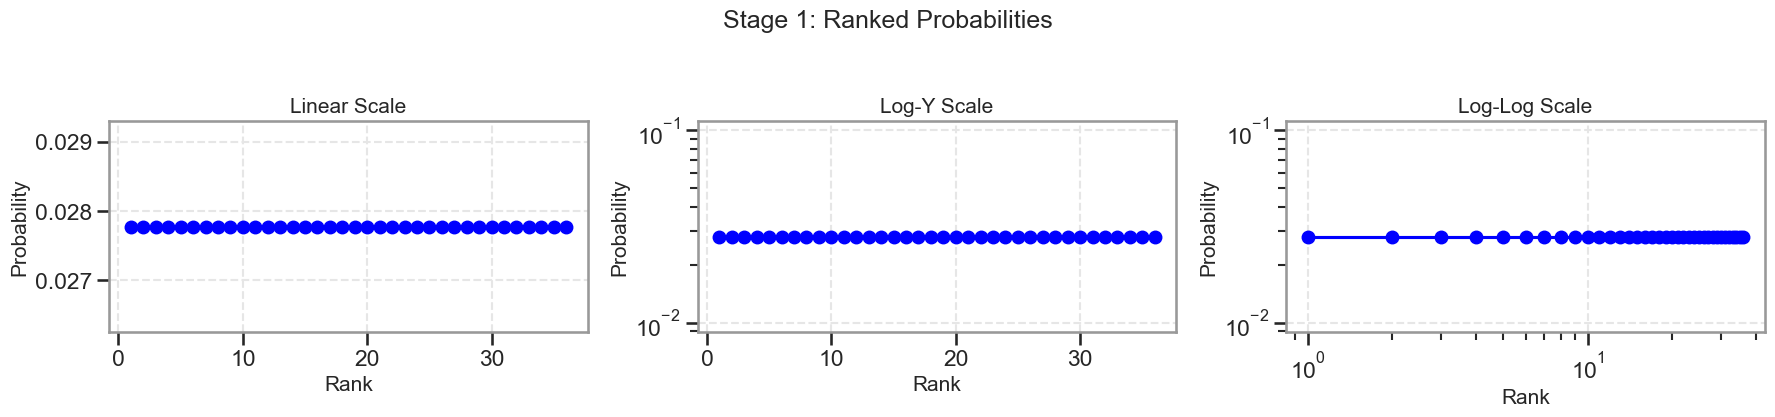

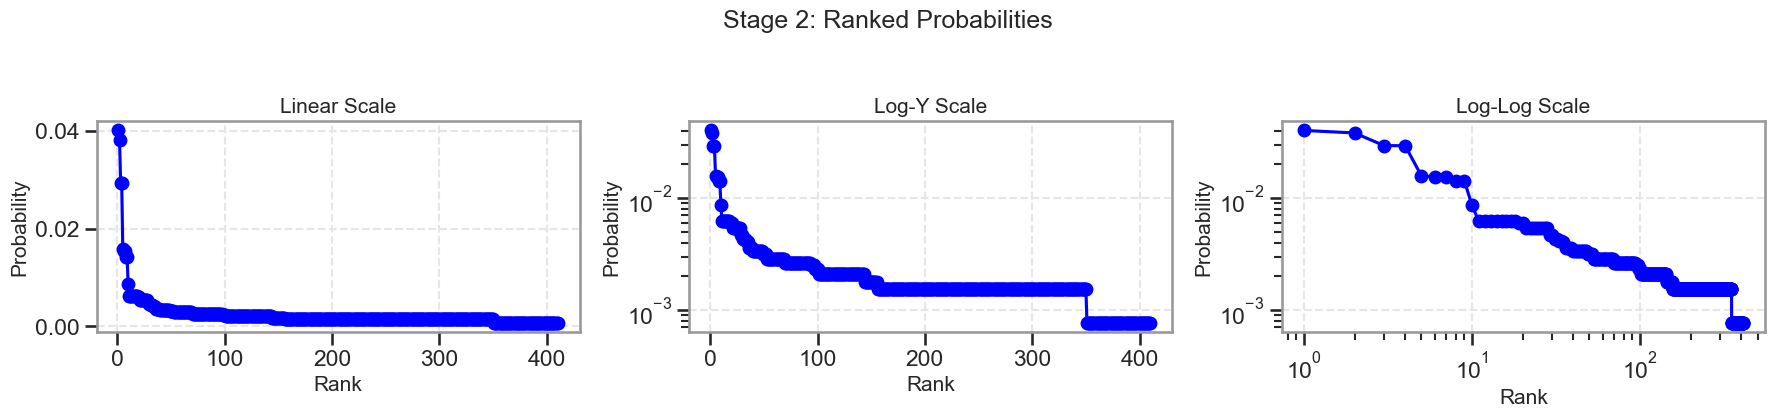

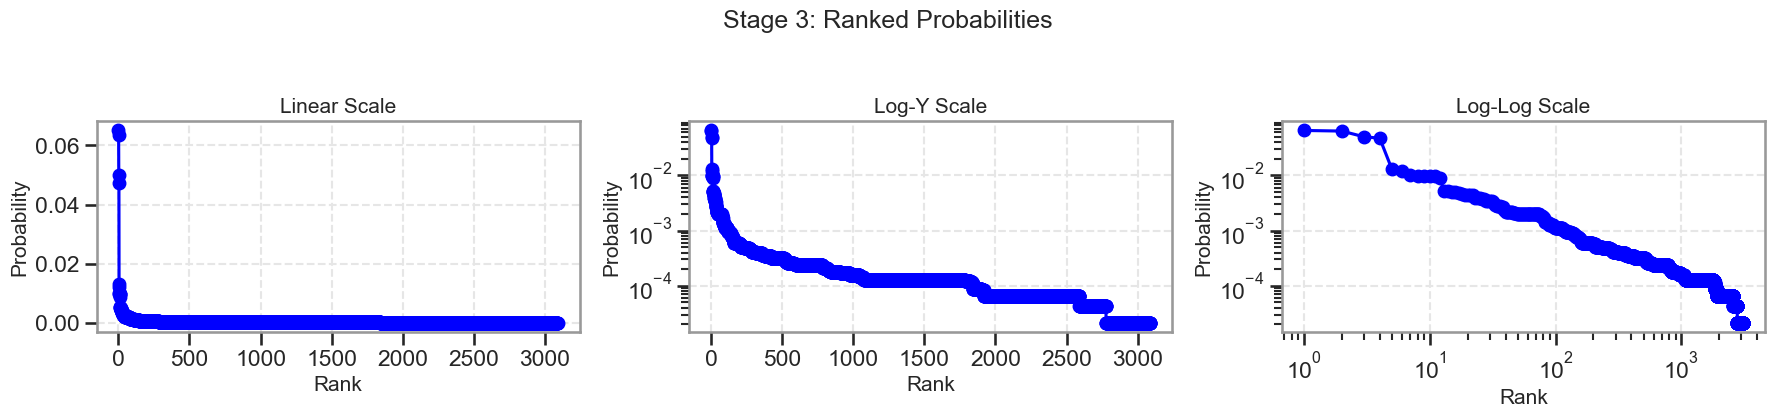

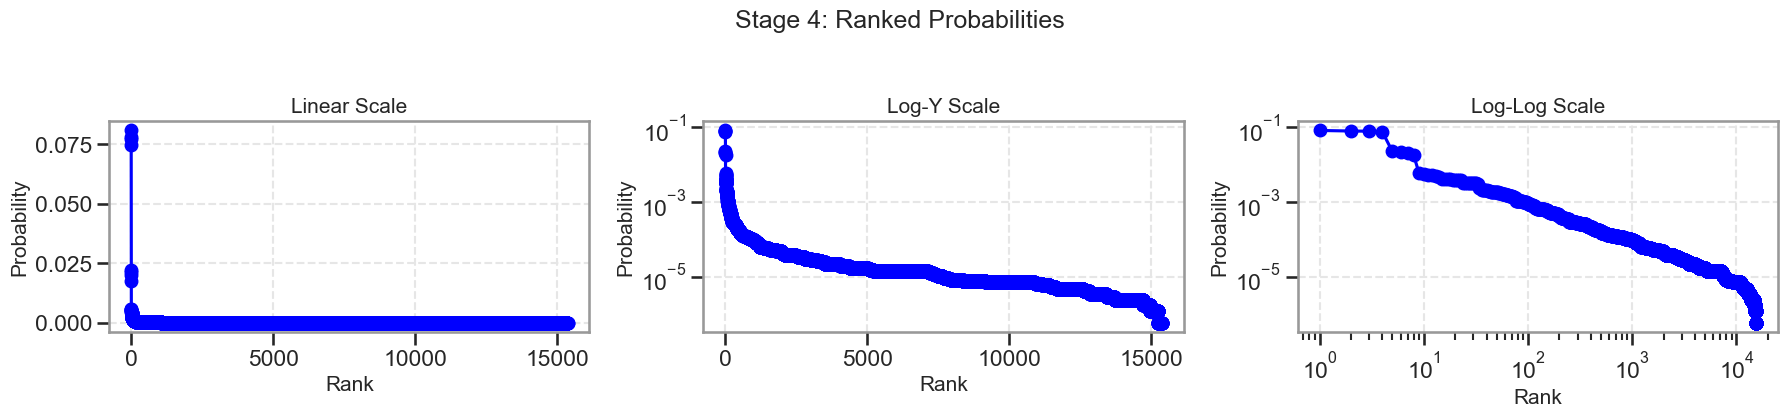

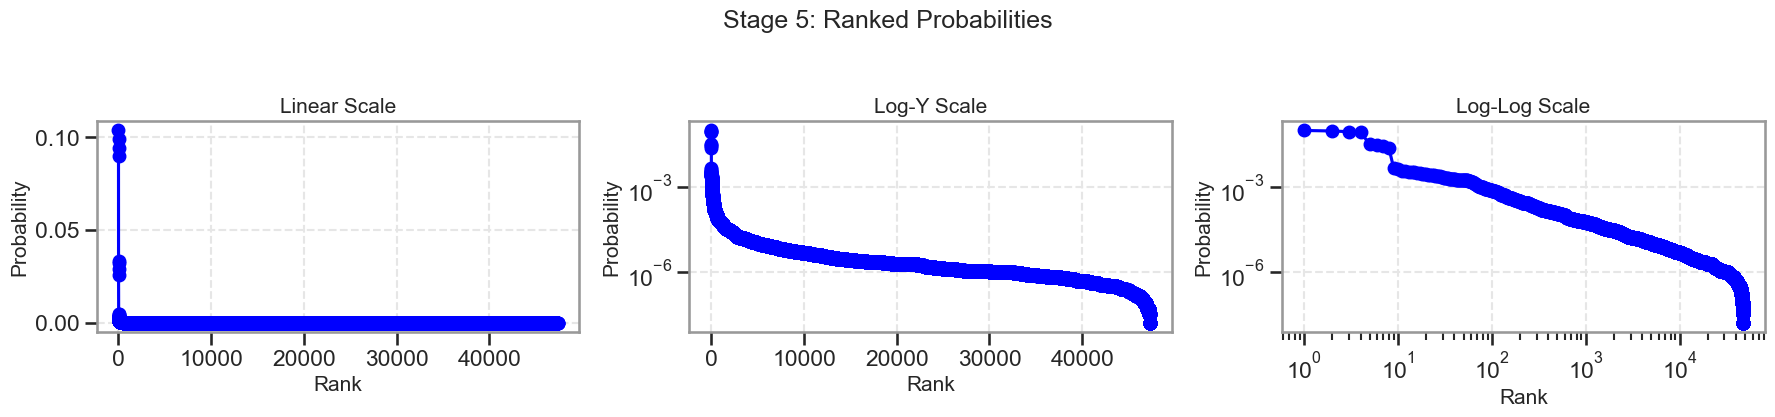

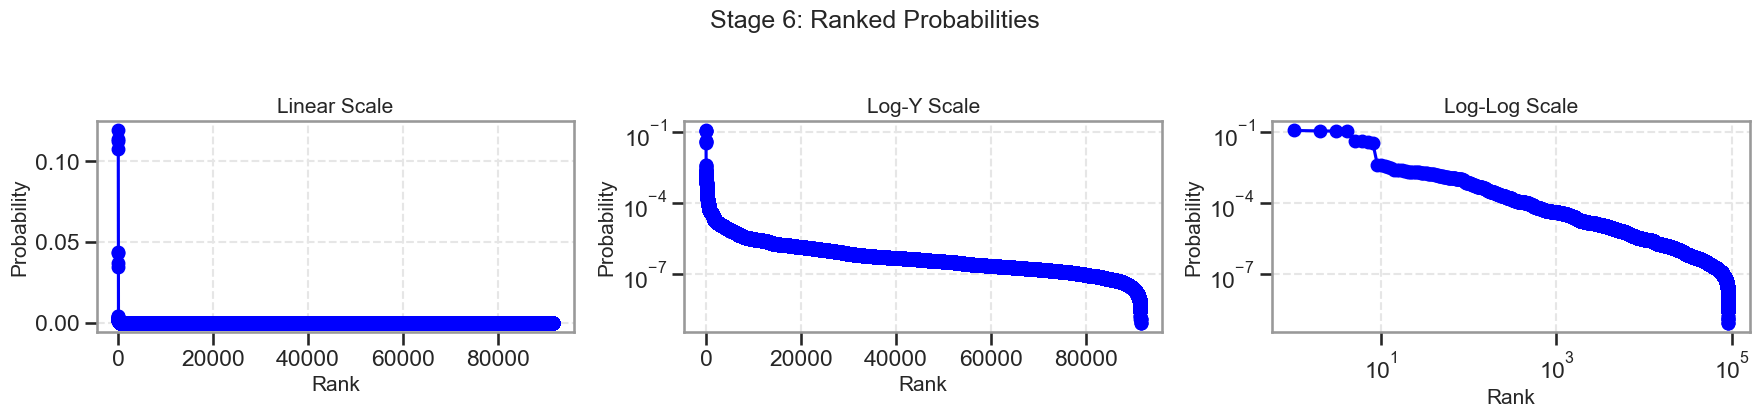

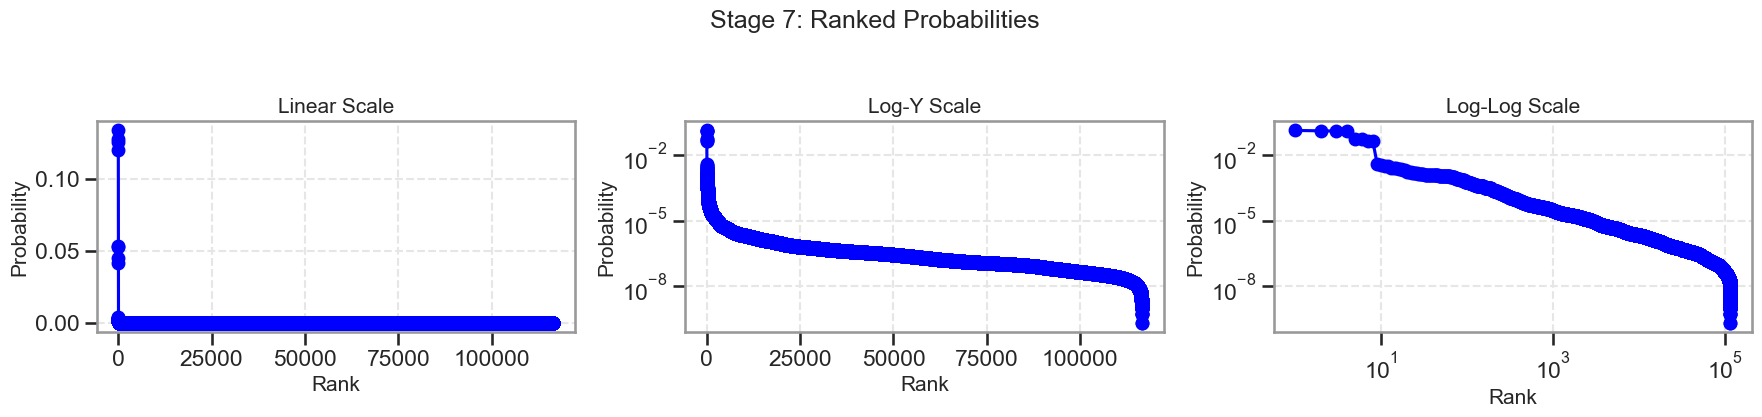

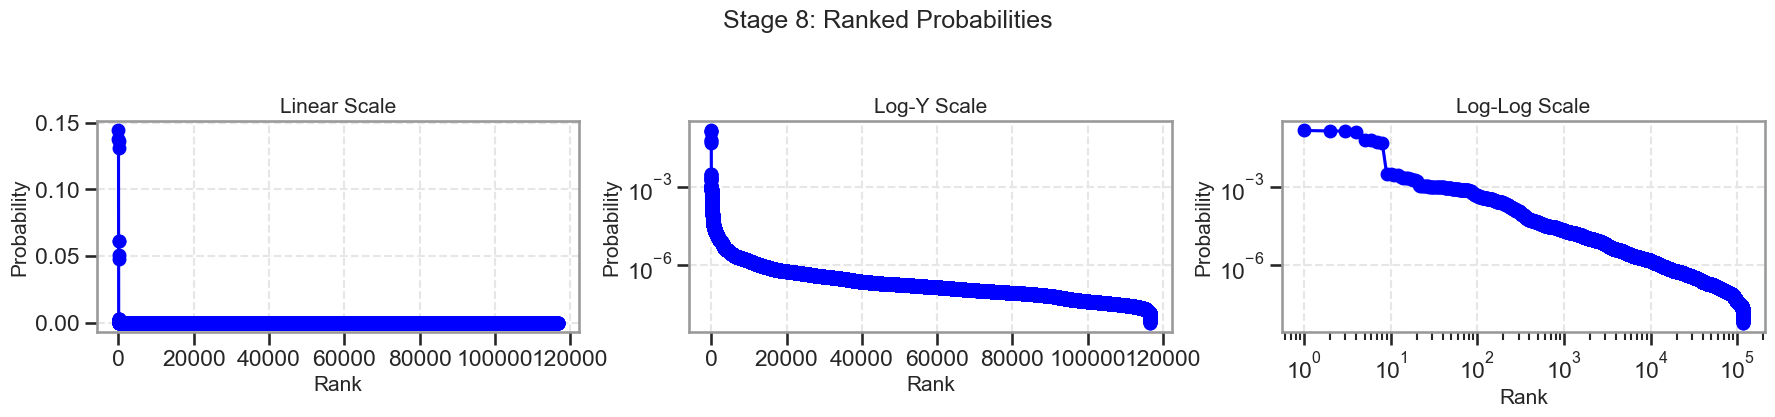

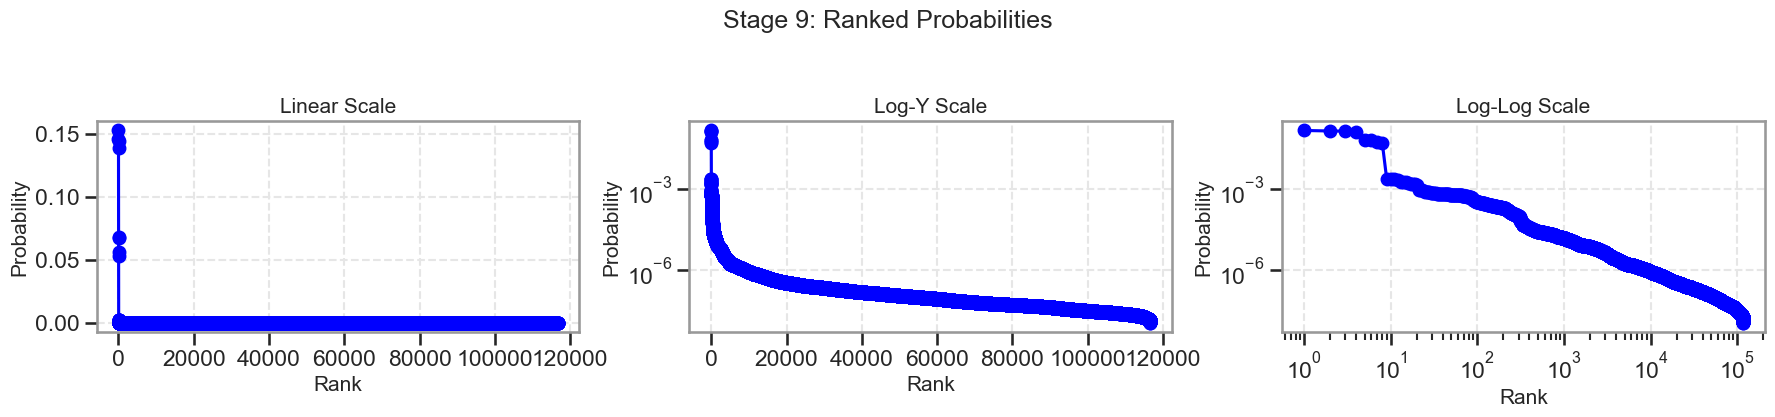

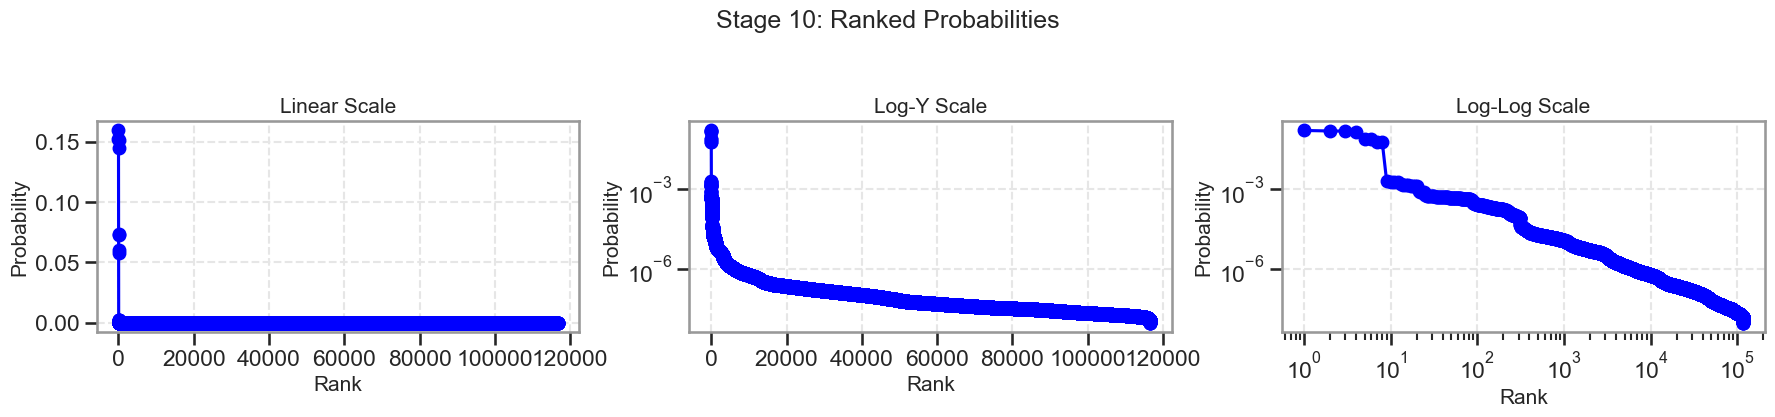

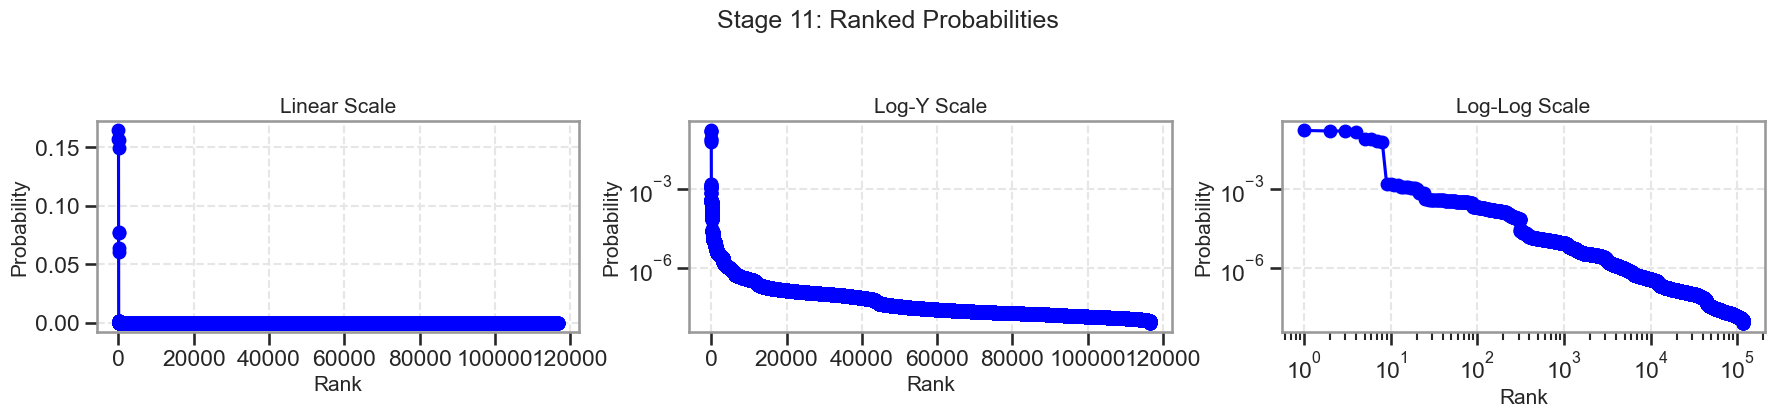

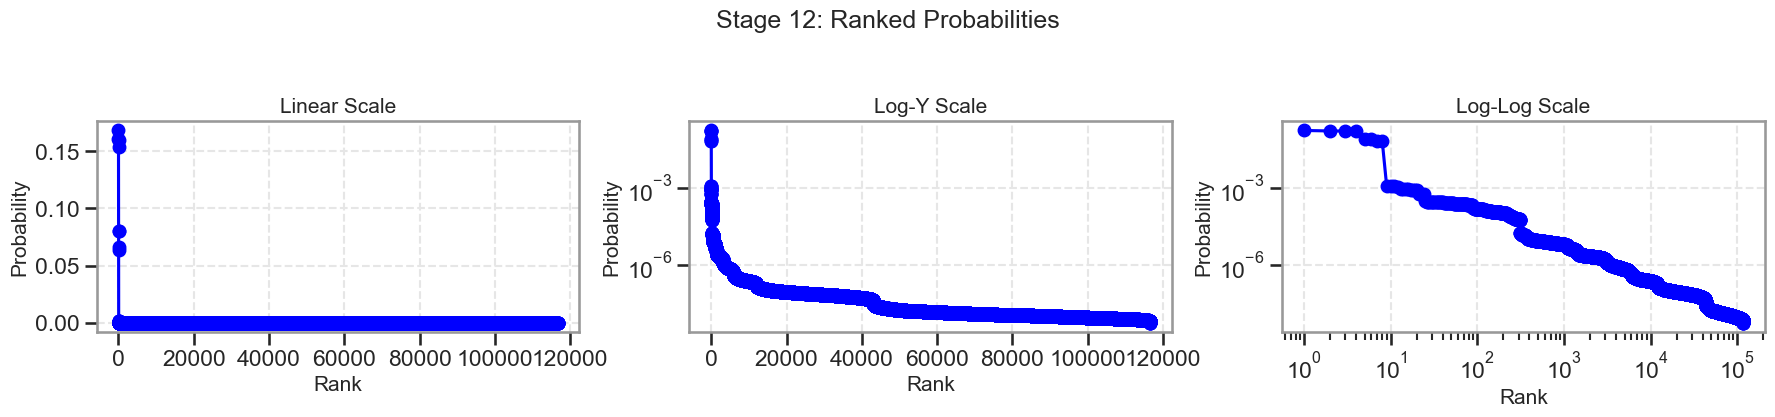

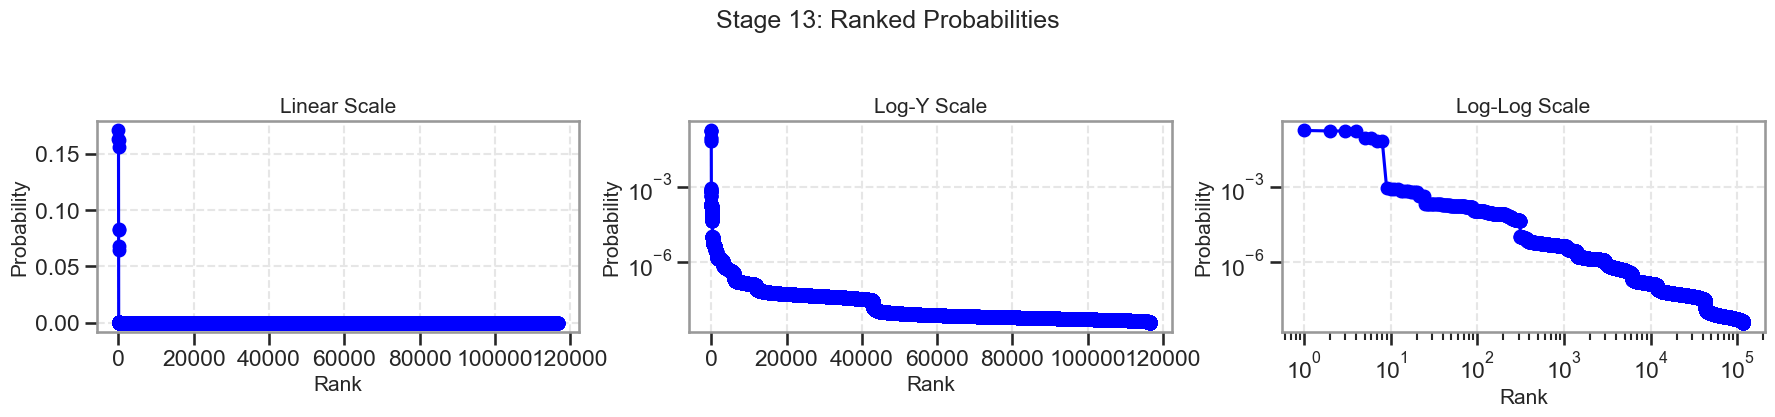

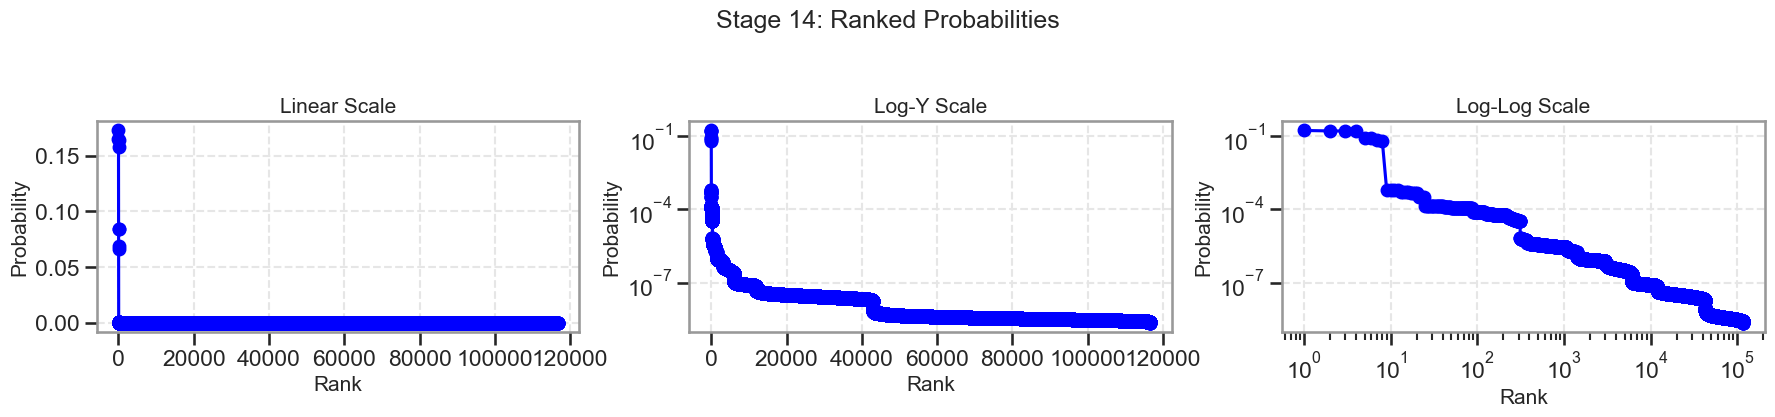

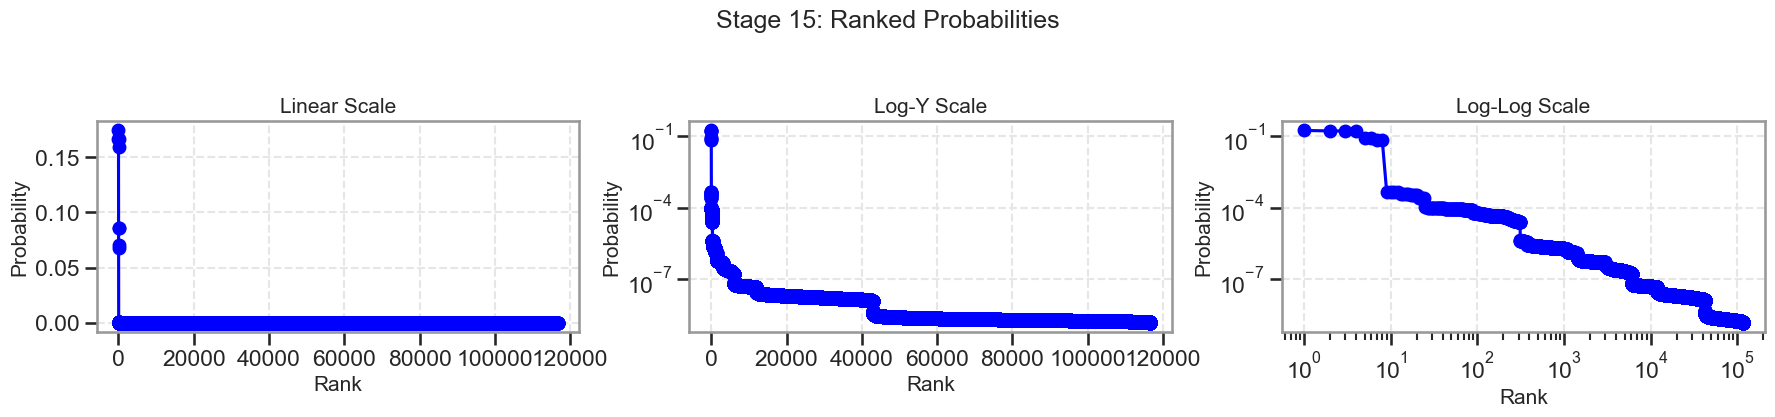

In [7]:
plot_probabilities(outcome_list, numberofevents=numberofevents)

In [8]:
#Just to get some numbers, ignore this part
probsum = 0
num_of_possible_outcomes = np.zeros(numberofevents)
total_num_of_outcomes = np.zeros(numberofevents)
entropy = np.zeros(numberofevents)
initial_dict=Counter()
for stage in range(numberofevents):
    probsum = np.sum(list(outcome_list[stage].values()))
    if (probsum-1)> 0.01 or (probsum-1)<-0.01:
        raise ValueError(f"Stage {stage} does not sum to 1, it sums to {probsum}. Please check the input data or the calculation logic.")
    entropy[stage] = -np.sum([p * np.log2(p) for p in outcome_list[stage].values() if p > 0])
    num_of_possible_outcomes[stage] = len(outcome_list[stage])
    initial_dict.update(outcome_list[stage])
    total_num_of_outcomes[stage] = len(initial_dict)



In [9]:
entropy

array([-0.        ,  5.169925  ,  8.04758143,  9.08516935,  8.950145  ,
        8.19575488,  7.24620866,  6.33692084,  5.55826416,  4.92554701,
        4.42638415,  4.04004742,  3.74517144,  3.52253342,  3.35594569,
        3.23225954])

In [10]:
total_num_of_outcomes

array([1.00000e+00, 3.70000e+01, 4.31000e+02, 3.32600e+03, 1.73710e+04,
       5.74340e+04, 1.23995e+05, 1.80719e+05, 1.99588e+05, 1.99608e+05,
       1.99608e+05, 1.99608e+05, 1.99608e+05, 1.99608e+05, 1.99608e+05,
       1.99608e+05])

In [11]:
total_num_of_outcomes[-1]==1866868

False